In [1]:
import sys
from thermopack.multiparameter import multiparam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sys.path.append("..")
from thermopack_example_utils import calc_reduced_T, calc_reduced_rho, calc_reduced_P
sns.set_context('talk')
sns.set_palette('Dark2')
sns.set_style('ticks')

In [2]:
lj = multiparam()
lj.init("AR", "LJ_MEOS")
lj_param = {"sigma": 3.3952e-10, "eps": 116.79}
lj.set_tmin(temp=5.0)
#
ljts = multiparam()
ljts.init("AR", "LJTS_MEOS")
ljts_param = {"sigma": 3.3916e-10, "eps": 137.90}
ljts.set_tmin(temp=5.0)

In [3]:
# Convert to reduced units
def get_reduced_properties(T, P, v, param):
    array_types = (np.ndarray, list)
    if not isinstance(T, array_types):
        T = np.array([T])
    T_r = calc_reduced_T(T, param["eps"])
    if not isinstance(P, array_types):
        P = np.array([P])
    P_r = calc_reduced_P(P, param["eps"], param["sigma"])
    if not isinstance(v, array_types):
        v = np.array([v])
    rho_r = calc_reduced_rho(1/v, param["sigma"])
    return T_r, rho_r, P_r

## Plot phase envelope

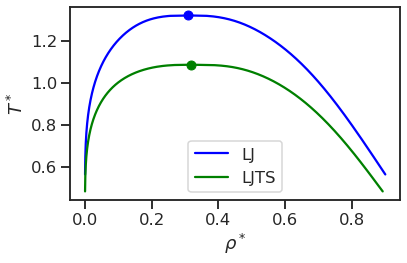

In [4]:
z = np.array([1.0])
T_lj, P_lj, v_lj = lj.get_envelope_twophase(5.0e3, z, maximum_pressure=2.0e6, calc_v=True)
T_lj_r, rho_lj_r, P_lj_r = get_reduced_properties(T_lj, P_lj, v_lj, lj_param)
Tc_lj, vc_lj, Pc_lj = lj.get_critcal_parameters(1)
Tc_lj_r, rhoc_lj_r, Pc_lj_r = get_reduced_properties(Tc_lj, Pc_lj, vc_lj, lj_param)
plt.plot(rho_lj_r, T_lj_r, "b", label="LJ")
plt.plot(rhoc_lj_r, Tc_lj_r, "bo")
#
T_ljts, P_ljts, v_ljts = ljts.get_envelope_twophase(5.0e3, z, maximum_pressure=2.0e6, calc_v=True)
T_ljts_r, rho_ljts_r, P_ljts_r = get_reduced_properties(T_ljts, P_ljts, v_ljts, ljts_param)
Tc_ljts, vc_ljts, Pc_ljts = ljts.get_critcal_parameters(1)
Tc_ljts_r, rhoc_ljts_r, Pc_ljts_r = get_reduced_properties(Tc_ljts, Pc_ljts, vc_ljts, ljts_param)
plt.plot(rho_ljts_r, T_ljts_r, "g", label="LJTS")
plt.plot(rhoc_ljts_r, Tc_ljts_r, "go")
#
plt.xlabel(r"$\rho^*$")
plt.ylabel(r"$T^*$")
leg = plt.legend(loc="best")
plt.tight_layout()
plt.show()

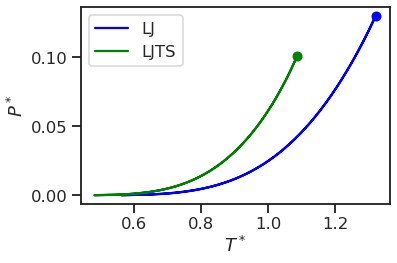

In [5]:
plt.plot(T_lj_r, P_lj_r, "b", label="LJ")
plt.plot(Tc_lj_r, Pc_lj_r, "bo")
#
plt.plot(T_ljts_r, P_ljts_r, "g", label="LJTS")
plt.plot(Tc_ljts_r, Pc_ljts_r, "go")
#
plt.xlabel(r"$T^*$")
plt.ylabel(r"$P^*$")
leg = plt.legend(loc="best")
plt.tight_layout()
plt.show()